# Supervised Learning | Project 2 | Thera Bank

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Introduction to Dataset

The file contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Attribute Information

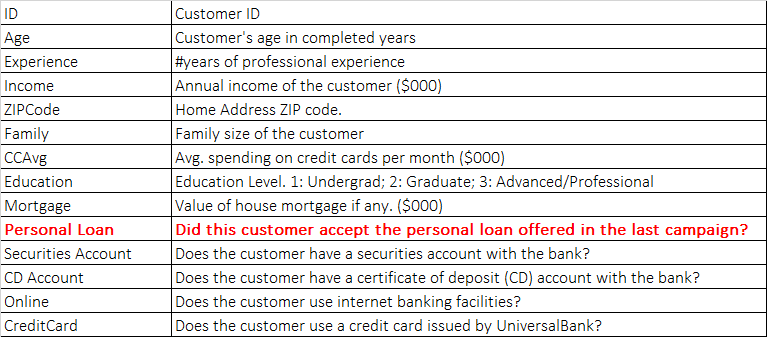

## Importing Key Modules

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency

# Import Libraries for Classification Model Building
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.svm import SVC #Support Vector Classifier

# Import Libraries for Train-Test split, Scaling,Label encoder and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

# Identification of Optimum vales for Hyperparameters for Model Tuning
from sklearn.model_selection import GridSearchCV

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

## Load the Dataset

Nomenclature: ploan -> Customer response dataset for last personal loan campaign.

In [2]:
# Loading Dataset
ploan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
ploan.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Shape of Personal Loan Campaign's Dataset
print("Number of Rows:",ploan.shape[0],"\n")
print("Number of Columns:",ploan.shape[1])

Number of Rows: 5000 

Number of Columns: 14


## Data Pre - Processing

In [4]:
# 1 Cleaning any leading/trailing whitespace in the column header
ploan.columns = [x.strip() for x in ploan.columns]
ploan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

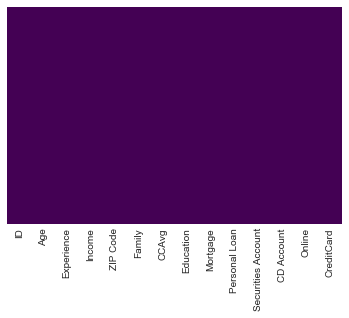

In [5]:
# 2 Missing Value through data visualization
sns.heatmap(ploan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Insights: Dataset is free from missing values

In [6]:
# 3 Checking for data pollution:
ploan[~ploan[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']].applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Insight: Quality of data in numeric columns is good and doesn't contain any object type value

## #1 Read the column description and ensure you understand each attribute well

In [7]:
# 1.1 Checking for datatypes 
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Insight: Here we can see that ZIP Code and Education are considered as int64 but logically these are categorical variables hence the datatype should be object. Also, Personal Loan, Security Accounts, CD Account, Online and CreditCard are int64 but are binary - keeping them as it is.

In [8]:
# 1.2 Assigning appropriate datatype to attributes

ploan['ID'] = ploan['ID'].astype(object)
ploan['ZIP Code'] = ploan['ZIP Code'].astype(object)
ploan['Education'] = ploan['Education'].astype(object)

# 1.3 Rechecking the assigned datatypes
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null object
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null object
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 547.0+ KB


In [9]:
# 1.4 Now understanding the numeric attributes through describe function
round(ploan.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


Insight: Here, Under experience we can see that min value is -3 years. This entry is logically incorrect. We need to treat this error

In [10]:
# 1.5 Looking for logical error related to negative values in dataset
(ploan < 0).astype(int).sum()

ID                    0 
Age                   0 
Experience            52
Income                0 
ZIP Code              0 
Family                0 
CCAvg                 0 
Education             0 
Mortgage              0 
Personal Loan         0 
Securities Account    0 
CD Account            0 
Online                0 
CreditCard            0 
dtype: int64

Insight: There are 52 entries in Experience where the total experience is in negative. We can remove these entries but we'll elliminate 1.04% data from total. We can impute these entries with mean, median, mode or any other logical entry

In [11]:
# 1.6 Imputing the logical error related to negative values in Experience with Median Age

# 1.6.1 Creating a Deep Copy of Dataset names as 'loan'
loan = ploan.copy(deep=True)
loan[loan['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# 1.6.2 Imputing negative values with Median age
loan[loan < 0] = np.nan # Converting to NaN
loan['Experience'] = loan['Experience'].fillna(loan['Experience'].median()).astype(int) # imputing nan with median

# 1.6.3 Crosschecking if there are any negative values left
(loan < 0).astype(int).sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# 1.6.4 Exporting the Transformed data for Eyeballing
loan.to_csv('personal loan_updated.csv',sep=',')

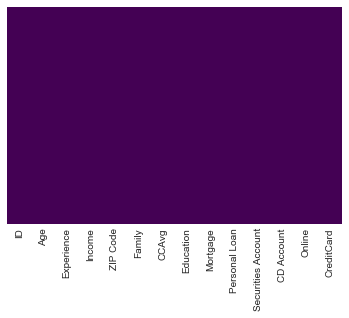

In [14]:
# 1.6.5 Crosschecking for missing values
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Insight: Understood each attribute well and based on understanding, assigned appropriate datatype to the attributes and removed logical impurities

In [15]:
# 1.7 Converting the categorical variable - Education Level into Dummy Variables

EL = pd.get_dummies(loan['Education'],prefix = "EL",prefix_sep = "_",drop_first = True)
loan.drop(['Education'],axis = 1,inplace = True)
loan = pd.concat([loan,EL],axis=1)

loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EL_2,EL_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0


In [16]:
# 1.8 Label Encoding categorical variable -ZIP Code

labelencoder = LabelEncoder()
loan['ZIP Code'] = labelencoder.fit_transform(loan['ZIP Code'])

loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EL_2,EL_3
0,1,25,1,49,83,4,1.6,0,0,1,0,0,0,0,0
1,2,45,19,34,34,3,1.5,0,0,1,0,0,0,0,0
2,3,39,15,11,367,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,298,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,96,4,1.0,0,0,0,0,0,1,1,0


In [17]:
# 1.9 Rechecking the datatypes
loan.dtypes

ID                    object 
Age                   int64  
Experience            int32  
Income                int64  
ZIP Code              int32  
Family                int64  
CCAvg                 float64
Mortgage              int64  
Personal Loan         int64  
Securities Account    int64  
CD Account            int64  
Online                int64  
CreditCard            int64  
EL_2                  uint8  
EL_3                  uint8  
dtype: object

## #2 Study the data distribution in each attribute, share your findings.

### Univariate Analysis

In [18]:
# 2.01 Now understanding the numeric attributes through describe function
round(loan.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.33,11.25,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,239.66,130.85,0.0,131.0,254.0,352.0,466.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


In [19]:
# 2.02 Skewness
loan.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.014100
Income                0.841339
ZIP Code             -0.132294
Family                0.155221
CCAvg                 1.598443
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
EL_2                  0.976940
EL_3                  0.872094
dtype: float64

In [20]:
# 2.03 Kurtosis
loan.kurtosis()

ID                   -1.200000 
Age                  -1.153067 
Experience           -1.115685 
Income               -0.044244 
ZIP Code             -1.175994 
Family               -1.403586 
CCAvg                 2.646706 
Mortgage              4.756797 
Personal Loan         5.529589 
Securities Account    4.701013 
CD Account            11.633404
Online               -1.844883 
CreditCard           -1.182191 
EL_2                 -1.046007 
EL_3                 -1.239948 
dtype: float64

Insight: Skewness and Kurtosis present in the numeric attributes

### Bivariate Analysis

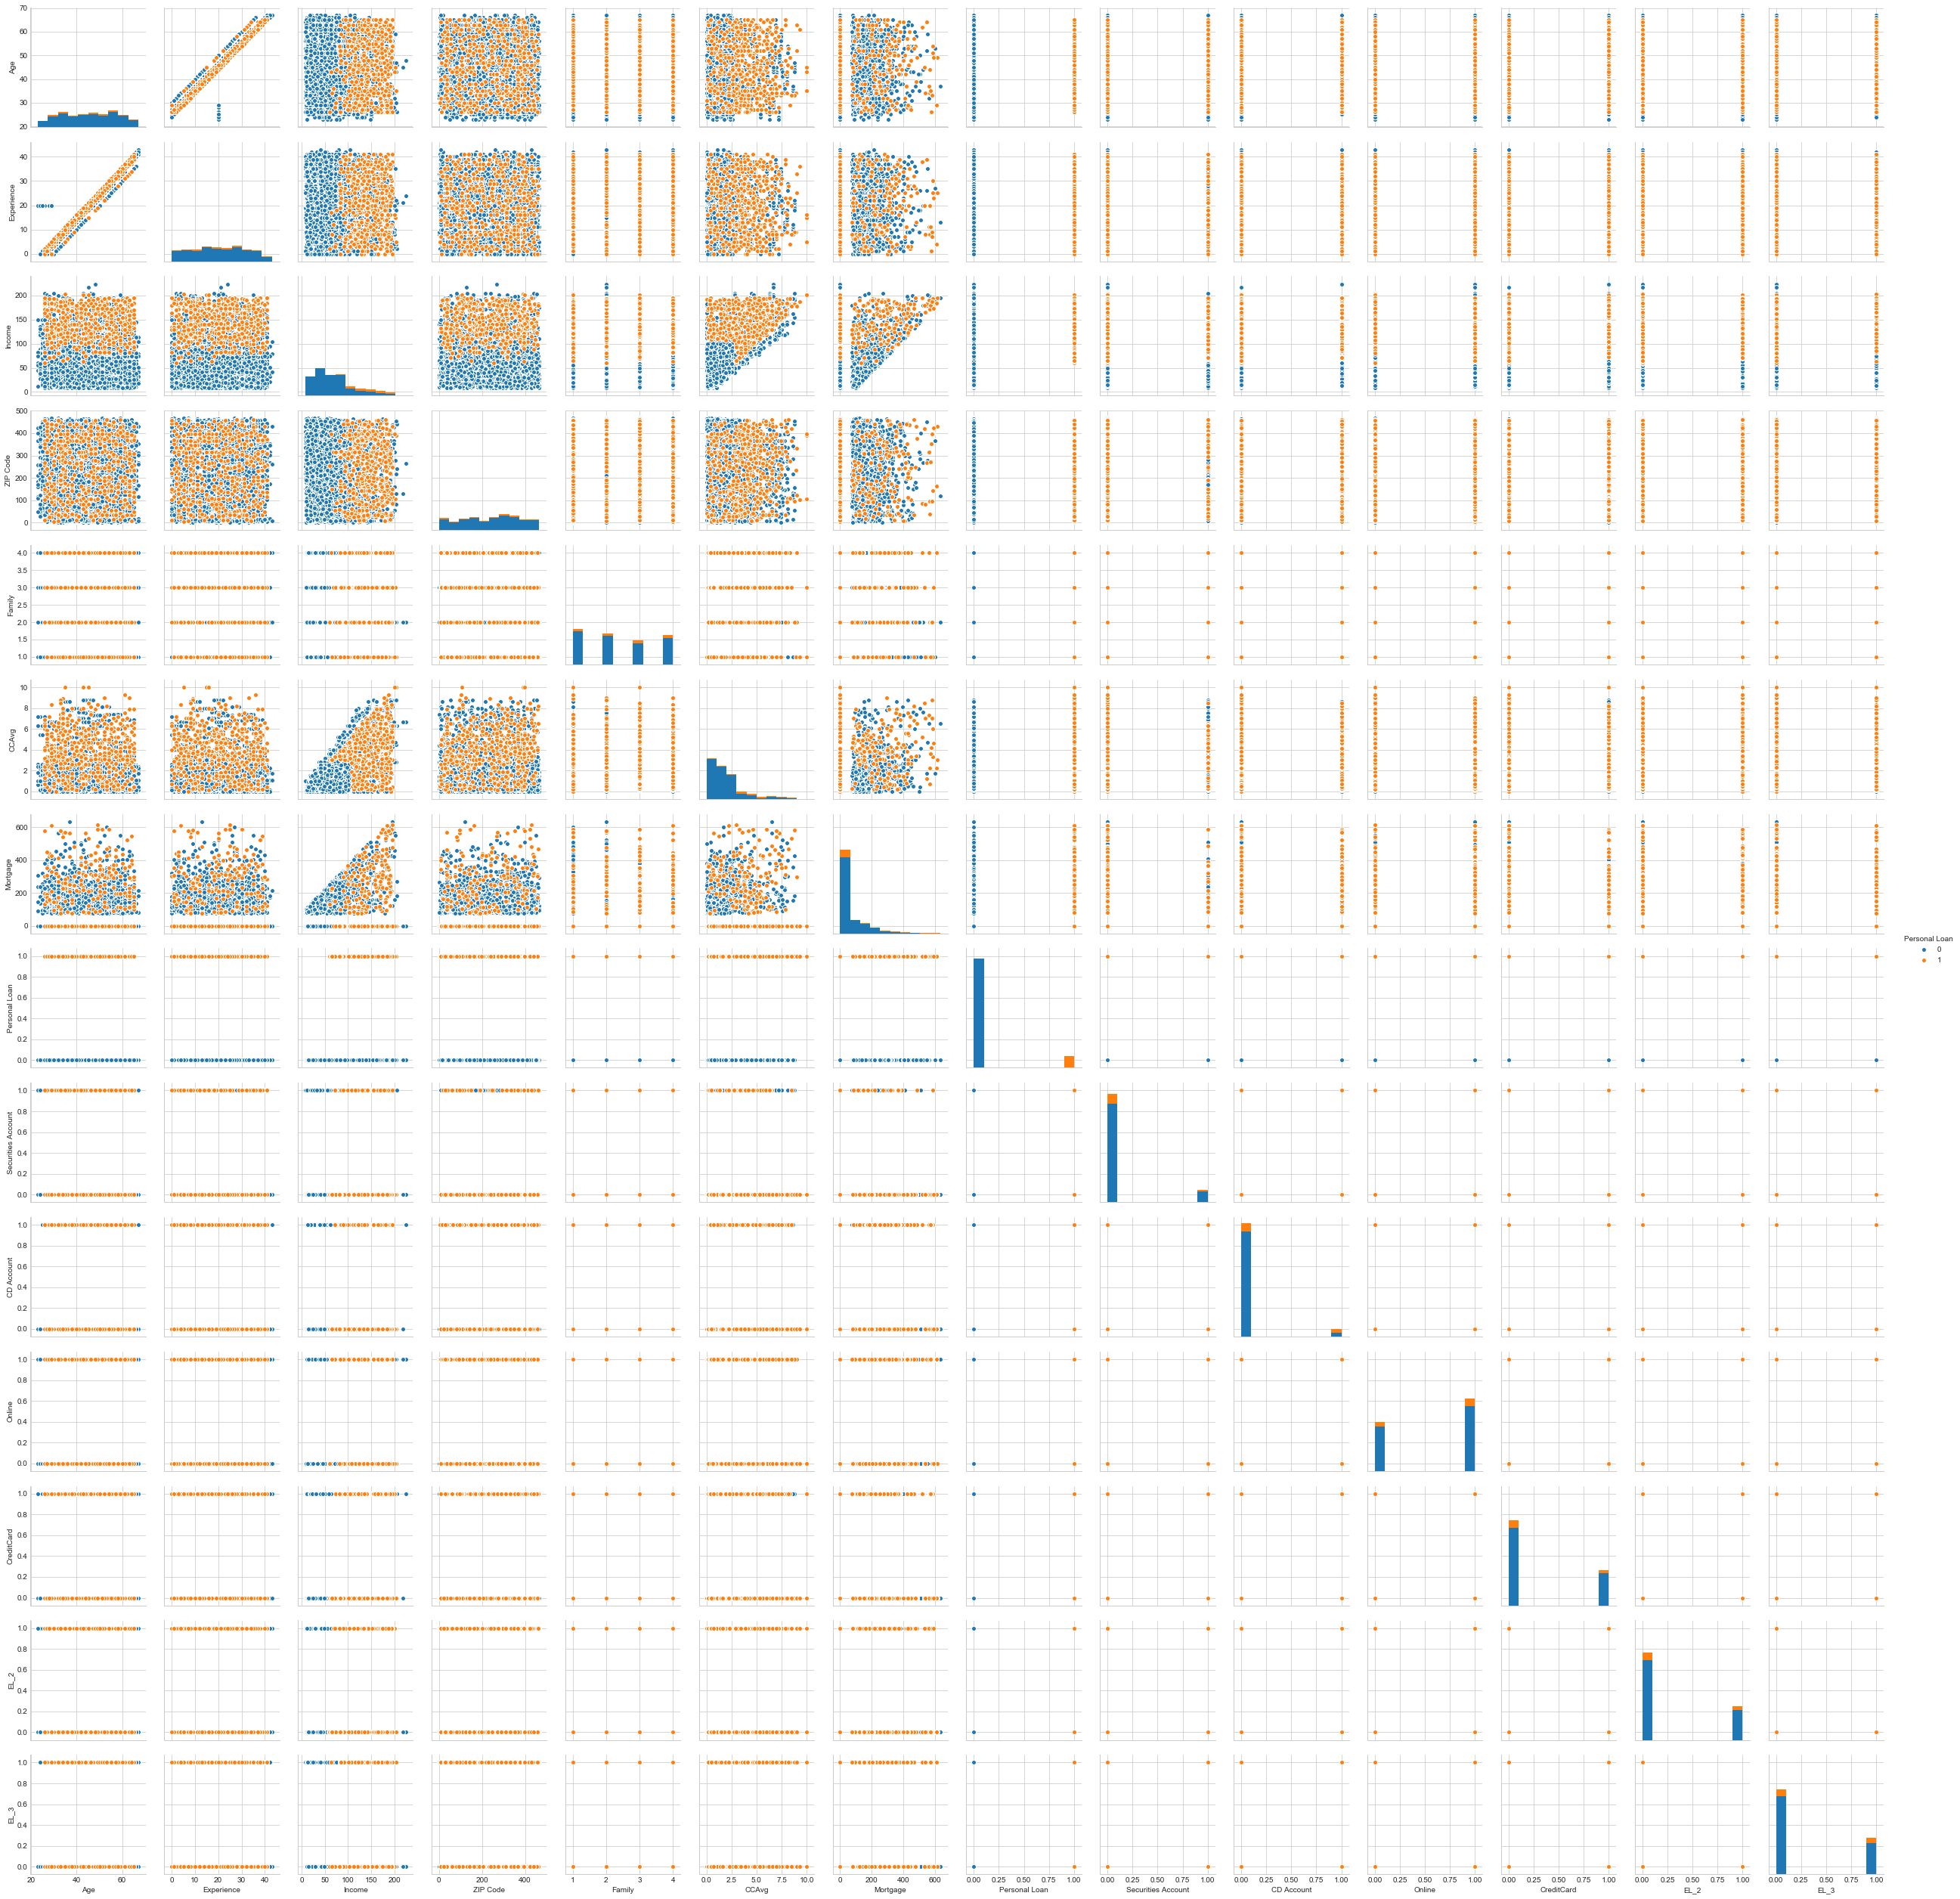

In [21]:
# 2.04 Pairplot Analysis
sns.pairplot(loan[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'EL_2', 'EL_3']],hue='Personal Loan')

Insight: Through pair plot one aspect is clear that age and experience have a positive linear relationship. Also, linear relationship can be seen between Income vs Average spending on Credit Card and Income vs Mortgage. In case of personal loan's relationship with other attributes mixed class distribution can be seen. Hence, we cannot say if there is any direct relationship. 

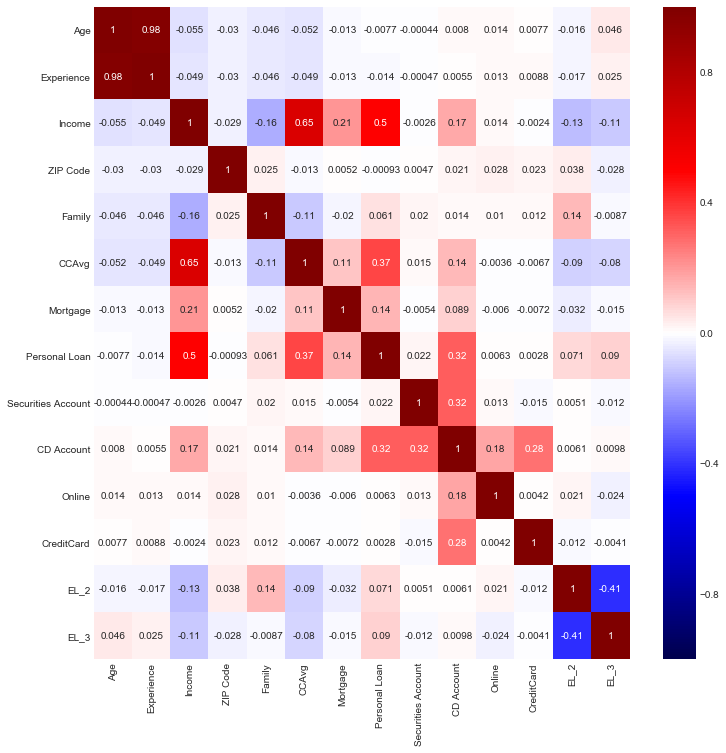

In [22]:
# 2.05 Correlation Plot

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(loan[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'EL_2', 'EL_3']].corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Insight: Through correlation plot we can see that there is high correlation between Age and Experience and moderate correlation between Income and CCAvg.
For our dependent variable 'Personal Loan' it's having moderate correlation with Income, CCAvg, Mortgage and CD Account. The Correlation between Personal Loan and ZIP Code, Security Account, Online, CreditCard, EL_2, EL_3 is poor, I'll perform CHI-Square test to identify if the categorical variables are dependent on each other, If not I'll drop them from study

In [23]:
# 2.06 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "ZIP Code"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont1 = pd.crosstab(loan["Personal Loan"],loan["ZIP Code"])

# Performing CHI Squared Test
chi2_contingency(cont1)

(444.15185491974455,
 0.7596677658976876,
 466,
 array([[9.04000e-01, 4.52000e+00, 5.42400e+00, 7.23200e+00, 2.71200e+00,
         1.80800e+00, 3.61600e+00, 4.52000e+00, 4.52000e+01, 1.71760e+01,
         2.71200e+00, 7.23200e+00, 4.52000e+00, 7.23200e+00, 8.13600e+00,
         1.80800e+01, 5.42400e+00, 6.32800e+00, 4.52000e+00, 9.04000e+00,
         1.80800e+00, 2.71200e+00, 3.61600e+00, 8.13600e+00, 2.71200e+00,
         5.42400e+00, 3.61600e+00, 1.26560e+01, 7.23200e+00, 5.42400e+00,
         9.04000e-01, 5.42400e+00, 5.42400e+00, 2.71200e+00, 4.15840e+01,
         6.41840e+01, 9.94400e+00, 7.23200e+00, 5.42400e+00, 4.52000e+00,
         4.52000e+01, 8.13600e+00, 6.32800e+00, 1.71760e+01, 1.80800e+00,
         4.52000e+00, 2.71200e+00, 1.44640e+01, 1.80800e+00, 1.62720e+01,
         1.80800e+00, 1.80800e+01, 4.52000e+00, 9.04000e+00, 5.42400e+00,
         7.23200e+00, 5.42400e+00, 2.71200e+00, 4.52000e+00, 3.61600e+00,
         1.80800e+00, 1.53680e+01, 4.52000e+00, 3.61600e+00, 2.7

Insight: Since, the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. I'll drop ZIP Code attribute from Model

In [24]:
# 2.07 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "Securities Account"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont2 = pd.crosstab(loan["Personal Loan"],loan["Securities Account"])

# Performing CHI Squared Test
chi2_contingency(cont2)

(2.172310545186504, 0.14051497326319357, 1, array([[4048.112,  471.888],
        [ 429.888,   50.112]]))

Insight: Since, the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. I'll drop Securities Account attribute.

In [25]:
# 2.8 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "Online"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont3 = pd.crosstab(loan["Personal Loan"],loan["Online"])

# Performing CHI Squared Test
chi2_contingency(cont3)

(0.1560067212052492, 0.6928599643141485, 1, array([[1822.464, 2697.536],
        [ 193.536,  286.464]]))

Insight: Since, the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. I'll drop Online attribute.

In [26]:
# 2.08 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "CreditCard"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont4 = pd.crosstab(loan["Personal Loan"],loan["CreditCard"])

# Performing CHI Squared Test
chi2_contingency(cont4)

(0.021144453920855056, 0.8843861223314504, 1, array([[3191.12, 1328.88],
        [ 338.88,  141.12]]))

Insight: Since, the p-value > 0.05 hence we conclude that the 2 categorical variables are independent. I'll drop Credit Card attribute.

In [27]:
# 2.09 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "Education Level 2"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont5 = pd.crosstab(loan["Personal Loan"],loan["EL_2"])

# Performing CHI Squared Test
chi2_contingency(cont5)

(25.01765646906518, 5.680771278053755e-07, 1, array([[3251.688, 1268.312],
        [ 345.312,  134.688]]))

Insight: Since, the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. I'll not drop Education Level 2 attribute.

In [28]:
# 2.10 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "Education Level 3"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont6 = pd.crosstab(loan["Personal Loan"],loan["EL_3"])

# Performing CHI Squared Test
chi2_contingency(cont6)

(40.02553115383214, 2.5066507137326973e-10, 1, array([[3163.096, 1356.904],
        [ 335.904,  144.096]]))

Insight: Since, the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. I'll not drop Education Level 3 attribute.

In [29]:
# 2.11 Goodness of Fit Test between 2 categorical variables - "Personal Loan" vs "CD Account"

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont7 = pd.crosstab(loan["Personal Loan"],loan["CD Account"])

# Performing CHI Squared Test
chi2_contingency(cont7)

(495.90424218782334, 7.398297503329848e-110, 1, array([[4246.992,  273.008],
        [ 451.008,   28.992]]))

Insight: Since, the p-value < 0.05 hence we conclude that the 2 categorical variables are dependent. I'll not drop CD Account attribute.

So, through Bivariate Analysis it can be said that personal loan is a funtion of age, experience, income, family, CCAvg, Mortgage, CD Account, EL_2 and EL_3

## #3 Get the target column distribution.

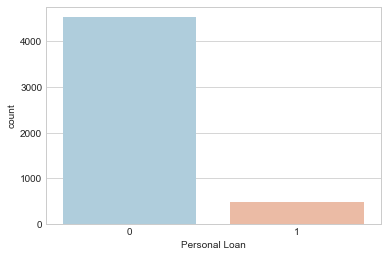

In [30]:
# 3.01 Target Column Distribution - In our case 'Personal Loan' is Target Variable
sns.countplot(x ='Personal Loan',data = loan,palette = 'RdBu_r')

In [31]:
# 3.02 Data Distribution of 'Personal Loan' across all variables
loan.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,EL_2,EL_3
Personal Loan,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480


Insight: We can see that our Target variable, 'Personal Loan' is imbalanced i.e. One class dominates over other class. In other words, frequecy of entries in one class is comparatively higher than other class. Here we can see that last year 'Personal Loan' campaign was launched for 5000 customers and out of that only 480 customers accepted. So, conversion ratio was 9.6% only, hence, the target class is imbalanced. One thing is for sure that in case of imbalanced class we shall not rely on accuracy as a parameter for model evaluation, we'll focus on other metrics such as 'Recall' or 'AUC Curve' to compare and evaluate our Supervised Learning Models

## Outlier Analysis

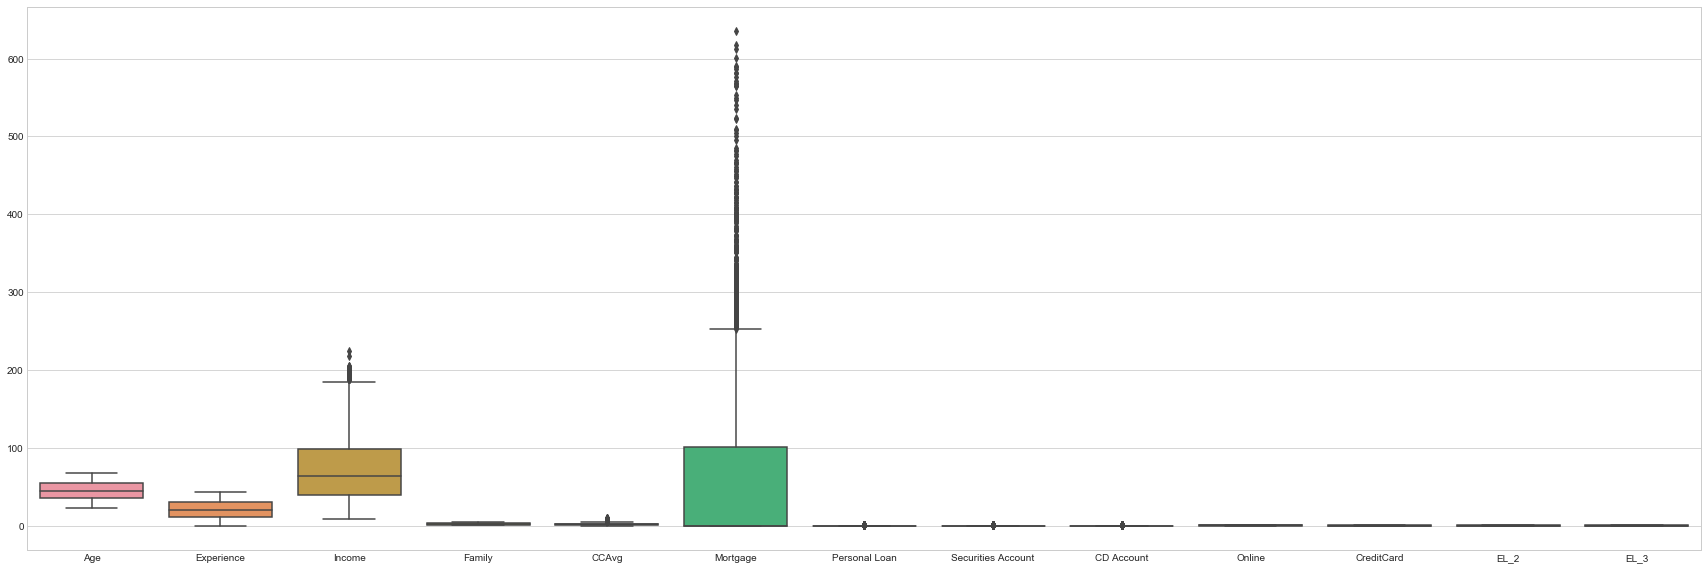

In [32]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = loan[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard','EL_2','EL_3']])

We can see the presence of outliers in Income and Mortgage. Let's treat the Outliers in our continuous variables by imputing them with max value

In [33]:
# Creating a Deep Copy of dataset named as 'load_wd', keeping loan for future reference
loan_wd = loan.copy(deep = True)

In [34]:
# Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = loan_wd[['Income','CCAvg','Mortgage']].quantile(0.25)
Q3 = loan_wd[['Income','CCAvg','Mortgage']].quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 Income      59.0 
CCAvg       1.8  
Mortgage    101.0
dtype: float64


In [35]:
# Imputing the Upper bound Outliers with Max Value
loan_wd.loc[loan_wd.Income > u_bound.Income, 'Income'] = u_bound.Income
loan_wd.loc[loan_wd.CCAvg > u_bound.CCAvg, 'CCAvg'] = u_bound.CCAvg
loan_wd.loc[loan_wd.Mortgage > u_bound.Mortgage, 'Mortgage'] = u_bound.Mortgage

In [36]:
# Imputing the Lower bound Outliers with Min Value
loan_wd.loc[loan_wd.Income < l_bound.Income, 'Income'] = l_bound.Income
loan_wd.loc[loan_wd.CCAvg < l_bound.CCAvg, 'CCAvg'] = l_bound.CCAvg
loan_wd.loc[loan_wd.Mortgage < l_bound.Mortgage, 'Mortgage'] = l_bound.Mortgage

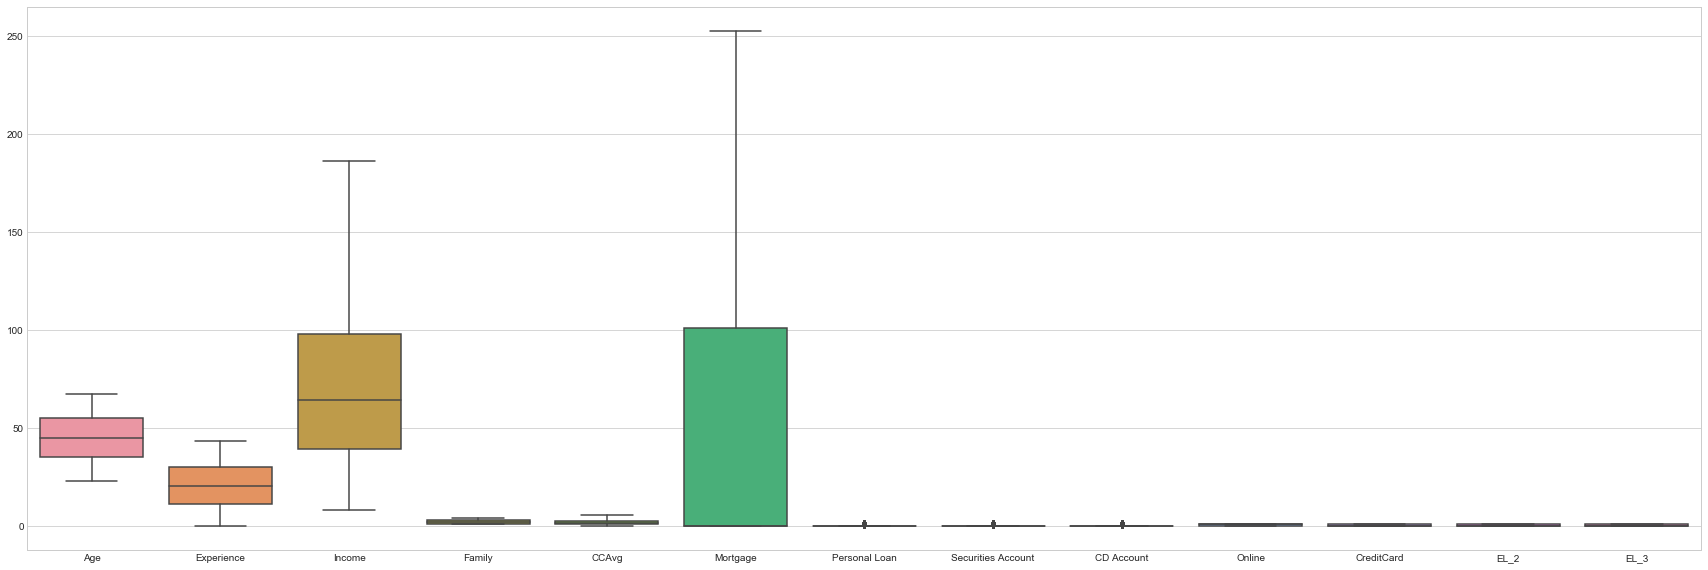

In [37]:
# BOXPLOT to see if their are any other outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = loan_wd[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard','EL_2','EL_3']])

No More Outliers in the dataset. We can proceed with model building and evaluation

## #4 Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
loan_wd.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'EL_2', 'EL_3'],
      dtype='object')

In [39]:
# 4.1 Differentiating Dataset into Dependent and Independent Variable

# Dependent Variable
Y = loan_wd['Personal Loan']

# Independent Variable
X = loan_wd[['Age', 'Experience', 'Income','Family', 'CCAvg', 'Mortgage', 'CD Account','EL_2', 'EL_3']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (5000,) 

Shape of Independent Variable:
 (5000, 9)


In [40]:
# 4.2 Splitting dataset into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables

# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (3500, 9)
Shape of X Test:	 (1500, 9)
Shape of Y Train:	 (3500,)
Shape of Y Test:	 (1500,)


## #5 & #6 Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans. Print the confusion matrix for all the above models

### #5.1 Logistic Regression

In [41]:
# Logistic Regression Classifier
logmodel = LogisticRegression()

# Model building on training dataset
logmodel.fit(X_train, Y_train)

# Prediction
lr_predict = logmodel.predict(X_test)

In [42]:
# Accuracy of Model
print("Accuracy on Training Set with Logistic Regression:",logmodel.score(X_train,Y_train))
print("Accuracy on Testing Set with Logistic Regression:",logmodel.score(X_test,Y_test))

# Confusion Matrix for Logistic Regression Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, lr_predict))

Accuracy on Training Set with Logistic Regression: 0.9577142857142857
Accuracy on Testing Set with Logistic Regression: 0.956


,0,1
0,1334,8
1,58,100


In [43]:
# Classification Report
print(classification_report(Y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.93      0.63      0.75       158

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.95      0.96      0.95      1500



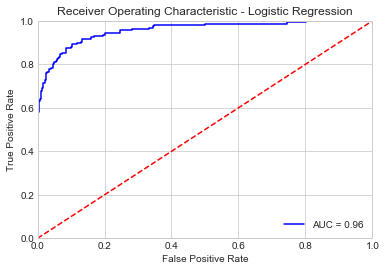

In [44]:
# ROC Curve for Model Evaluation

# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### #5.2 Logistic Regresion with Hyper Parameter Tuning using GridSearchCV

In [45]:
# Using Grid Search to identify optimum value for "C" and "Penalty"

parameters = {'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7)} # l1 lasso l2 ridge
GS_lr = GridSearchCV(logmodel,parameters,cv=10)

# Model building on training dataset
GS_lr.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",GS_lr.best_score_)
print("Best Paramters:", GS_lr.best_params_)

Best Accuracy: 0.9612
Best Paramters: {'C': 100.0, 'penalty': 'l2'}


Insight: We can see that for 10 K-folds we're able to produce Best Accuracy of 96.12% with 'C' = 100 and 'penalty' = 'l2'. Applying this on our train and test dataset

In [47]:
# Logistic Regression Classifier
reg_lr = LogisticRegression(C = 100, penalty = 'l2')

# Model building on training dataset
reg_lr.fit(X_train, Y_train)

# Prediction
reg_lr_predict = reg_lr.predict(X_test)

# Accuracy of Model
print("Accuracy on Training Set with Regularized Logistic Regression:",reg_lr.score(X_train,Y_train))
print("Accuracy on Testing Set with Regularized Logistic Regression:",reg_lr.score(X_test,Y_test))

# Confusion Matrix for Logistic Regression Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, reg_lr_predict))

Accuracy on Training Set with Regularized Logistic Regression: 0.9642857142857143
Accuracy on Testing Set with Regularized Logistic Regression: 0.956


,0,1
0,1328,14
1,52,106


In [48]:
# Classification Report
print(classification_report(Y_test,reg_lr_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.88      0.67      0.76       158

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.92      0.83      0.87      1500
weighted avg       0.95      0.96      0.95      1500



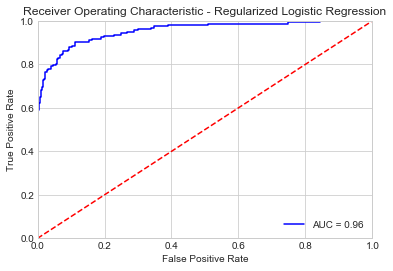

In [49]:
# ROC Curve for Model Evaluation

# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = reg_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
plt.title('Receiver Operating Characteristic - Regularized Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### #5.3 K-Nearest Neighbour with Hyper Parameter Tuning using GridSearchCV

To fit KNN algorithm on dataset we need to scale the independent variables

In [50]:
# Scaling the Data
XZ = X.apply(stats.zscore)

# Dividing the dataset into train and test sets
XZ_train, XZ_test, Y_train, Y_test = train_test_split(XZ, Y, test_size=0.3, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",XZ_train.shape)
print("Shape of X Test:\t",XZ_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (3500, 9)
Shape of X Test:	 (1500, 9)
Shape of Y Train:	 (3500,)
Shape of Y Test:	 (1500,)


In [51]:
# Using Grid Search to identify optimum value for K
k = np.arange(1,50)
knn = KNeighborsClassifier(weights = 'uniform', metric='euclidean')
parameters = {'n_neighbors': k}
GS_knn = GridSearchCV(knn,parameters,cv=10)

# Model building on training dataset
GS_knn.fit(XZ,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",GS_knn.best_score_)
print("Best Paramters:", GS_knn.best_params_)

Best Accuracy: 0.9768
Best Paramters: {'n_neighbors': 1}


Insight: We can see that for 10 K-folds we're able to produce Best Accuracy of 97.68% with 'n_neighbour'. Applying this on our train and test dataset

In [53]:
# KNN Classifier
NNH1 = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='euclidean')

# Model building on training dataset
NNH1.fit(XZ_train, Y_train)

# Prediction
NNH1_predict = NNH1.predict(XZ_test)

# Accuracy of Model
print("Accuracy on Training Set with kNN Classifier:",NNH1.score(XZ_train,Y_train))
print("Accuracy on Testing Set with kNN Classifier:",NNH1.score(XZ_test,Y_test))

# Confusion Matrix for kNN Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, NNH1_predict))

Accuracy on Training Set with kNN Classifier: 1.0
Accuracy on Testing Set with kNN Classifier: 0.974


,0,1
0,1333,9
1,30,128


In [54]:
# Classification Report
print(classification_report(Y_test,NNH1_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1342
           1       0.93      0.81      0.87       158

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.96      0.90      0.93      1500
weighted avg       0.97      0.97      0.97      1500



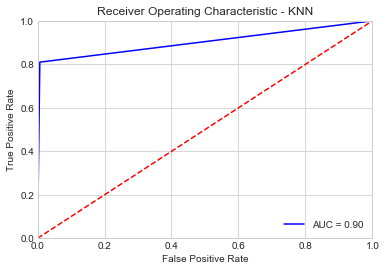

In [55]:
# ROC Curve for Model Evaluation

# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = NNH1.predict_proba(XZ_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### #5.3 Naive Bayes

In [56]:
# Naive Bayes Classifier
nbayes = GaussianNB()

# Model building on training dataset
nbayes.fit(X_train, Y_train)

# Prediction
nbayes_predict = nbayes.predict(X_test)

In [57]:
# Accuracy of Model
print("Accuracy on Training Set with Naive Bayes Classifier:",nbayes.score(XZ_train,Y_train))
print("Accuracy on Testing Set with Naive Bayes Classifier:",nbayes.score(XZ_test,Y_test))

# Confusion Matrix for kNN Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, nbayes_predict))

Accuracy on Training Set with Naive Bayes Classifier: 0.9017142857142857
Accuracy on Testing Set with Naive Bayes Classifier: 0.8946666666666667


,0,1
0,1231,111
1,50,108


In [58]:
# Classification Report
print(classification_report(Y_test,nbayes_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1342
           1       0.49      0.68      0.57       158

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.73      0.80      0.76      1500
weighted avg       0.91      0.89      0.90      1500



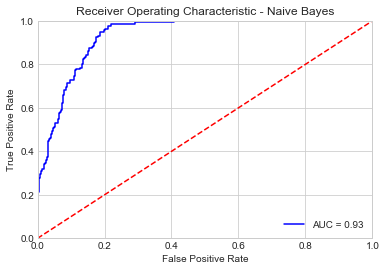

In [59]:
# ROC Curve for Model Evaluation

# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = nbayes.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()